In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [31]:
train_df = pd.read_csv('mnist_train.csv')
test_df = pd.read_csv('mnist_test.csv')

In [33]:
combined_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)
print(combined_df.shape)

(464, 785)


In [35]:
combined_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0


In [37]:
# Separate features and labels
X_combined = combined_df.drop('label', axis=1)
y_combined = combined_df['label']

In [39]:
# Handling NaNs by checking them
print("Feature:",combined_df.drop('label', axis=1).isna().sum().sum())
print("Label:",combined_df['label'].isna().sum())

Feature: 177
Label: 2


In [84]:
# Fill missing values with the median
imputer_X = SimpleImputer(strategy='median')
X_combined = imputer_X.fit_transform(X_combined)
imputer_y = SimpleImputer(strategy='median')
y_combined = imputer_y.fit_transform(y_combined.reshape(-1, 1)).ravel()

In [86]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'MLP Classifier': MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=300),
    'KMeans': KMeans(n_clusters=10, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    

Logistic Regression Accuracy: 0.8495
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       0.73      1.00      0.84         8
         2.0       0.91      0.77      0.83        13
         3.0       0.60      0.75      0.67         8
         4.0       0.90      1.00      0.95         9
         5.0       0.83      0.56      0.67         9
         6.0       1.00      0.92      0.96        13
         7.0       0.75      0.82      0.78        11
         8.0       1.00      0.80      0.89         5
         9.0       0.89      0.89      0.89         9

    accuracy                           0.85        93
   macro avg       0.86      0.85      0.85        93
weighted avg       0.86      0.85      0.85        93

KNN Accuracy: 0.7097
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94         8
         1.0       0.38      1.00      0.55         8
         2.0       1

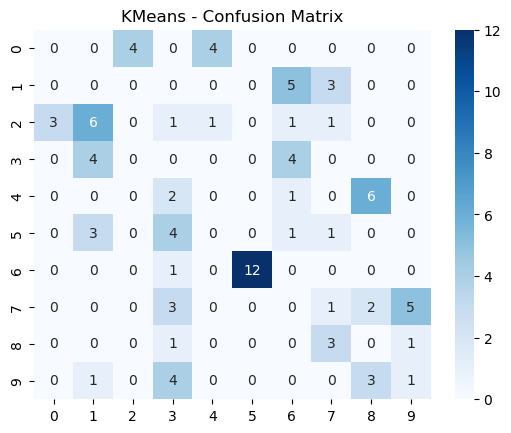

In [92]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title(f"{name} - Confusion Matrix")
plt.show()

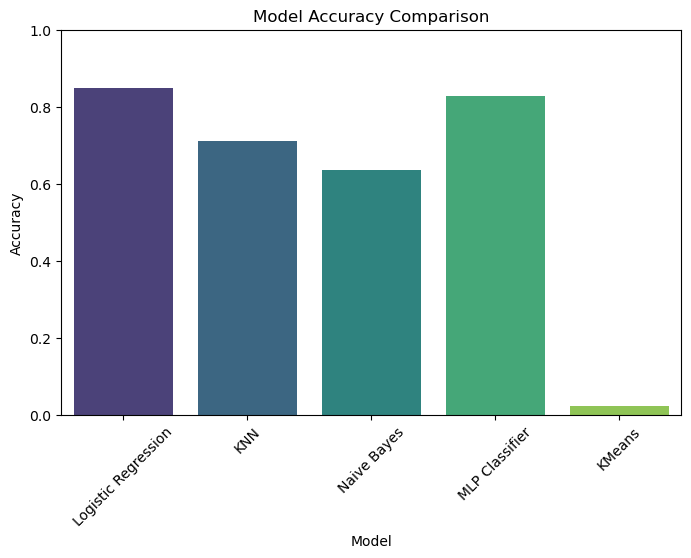

In [100]:
# Plot model accuracy comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.xticks(rotation=45)
plt.show()

In [102]:
# Summary of Results
results_df = pd.DataFrame(results.items(), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
print(results_df)

                 Model  Accuracy
0  Logistic Regression  0.849462
3       MLP Classifier  0.827957
1                  KNN  0.709677
2          Naive Bayes  0.634409
4               KMeans  0.021505
